In [2]:
import numpy as np
import pandas as pd
from sklearn import tree, model_selection
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from bayes_opt import BayesianOptimization
import catboost as cat

In [3]:
df = pd.read_csv('F:/Applied Machine Learning/Project/listing_data_clean_final_v2_extra.csv')

In [4]:
df.head(10)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,...,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.80,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,...,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.00,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,...,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.80,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,...,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt
3,1.00,0.93,1,1.0,1,0,51.44687,-0.21874,1,Apartment,...,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,2,Apartment_Entire home/apt
4,0.90,1.00,1,3.0,1,0,51.57224,-0.20906,1,Apartment,...,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,2,Apartment_Private room
5,1.00,0.85,0,2.0,1,1,51.46507,-0.32421,1,Apartment,...,1,0,1,1,1547.044208,22598.480547,23344.394742,67.0,2,Apartment_Private room
6,1.00,0.81,1,1.0,1,1,51.47934,-0.28066,0,Apartment,...,1,1,1,1,378.397034,19542.521887,20172.479358,197.0,2,Apartment_Entire home/apt
7,1.00,1.00,1,4.0,1,0,51.58461,-0.16170,0,Apartment,...,1,0,1,1,374.054937,16458.718168,15606.064671,87.0,2,Apartment_Private room
8,0.33,0.10,0,2.0,1,0,51.53972,-0.05885,0,Apartment,...,1,0,1,1,800.322416,8138.726963,7006.656799,410.0,2,Apartment_Entire home/apt
9,1.00,0.33,0,1.0,1,0,51.46871,-0.06455,1,Apartment,...,0,0,1,1,1845.919030,4664.509879,5834.915892,322.0,2,Apartment_Private room


In [5]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [6]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_duration_days', 'listing_duration_days', 'region',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wi

In [7]:
df['rating_class'].unique()

array([2, 1, 0], dtype=int64)

In [8]:
df = df.drop(['latitude', 'longitude','number_of_reviews','reviews_per_month','host_total_listings_count','property_type','room_type','host_is_superhost'],axis = 1)

In [9]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews_ltm',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_duration_days',
       'listing_duration_days', 'region', 'occupancy_rate', 'crime_rate',
       'hangers', 'washer', 'tv', 'detector', 'kitchen', 'heating',
       'essentials', 'iron', 'wifi', 'dryer', 'min_dist_subway',
       'min_dist_park', 'min_dist_attraction', 'recency', 'rating_class',
       'property_room_type'],
      dtype='object')

In [10]:
pd.set_option('display.max_columns',200)

In [11]:
df.head(10)

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.80,0.88,1,1,1,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,6,0,moderate,0,0,1,2,0,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.00,0.86,1,1,1,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,4,1,strict_14_with_grace_period,1,1,1,0,0,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.80,0.95,1,1,0,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,2,1,strict_14_with_grace_period,0,0,15,0,0,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt
3,1.00,0.93,1,0,1,4,1.0,2.0,2.0,Real Bed,65.0,350.0,55.0,2,11.0,21,1125,8,0,moderate,0,0,1,0,0,3694.0,1531.0,South,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,2,Apartment_Entire home/apt
4,0.90,1.00,1,0,1,2,1.5,1.0,0.0,Real Bed,29.0,100.0,0.0,1,8.0,10,1120,8,1,strict_14_with_grace_period,0,0,0,3,0,3692.0,3683.0,North,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,2,Apartment_Private room
5,1.00,0.85,1,1,1,2,1.0,1.0,1.0,Real Bed,100.0,0.0,0.0,1,0.0,1,21,2,0,flexible,0,0,1,1,0,3622.0,3498.0,West,0.008219,0.713,0,1,0,1,1,1,1,0,1,1,1547.044208,22598.480547,23344.394742,67.0,2,Apartment_Private room
6,1.00,0.81,1,1,0,5,1.5,3.0,3.0,Real Bed,195.0,0.0,0.0,1,0.0,3,22,11,0,moderate,0,0,1,0,0,3606.0,3489.0,West,0.076712,0.499,1,1,1,1,1,1,1,1,1,1,378.397034,19542.521887,20172.479358,197.0,2,Apartment_Entire home/apt
7,1.00,1.00,1,0,0,2,0.0,1.0,0.0,Real Bed,72.0,0.0,0.0,1,0.0,2,365,35,1,strict_14_with_grace_period,0,0,0,4,0,3602.0,3530.0,North,0.126027,0.858,1,0,1,1,0,1,1,0,1,1,374.054937,16458.718168,15606.064671,87.0,2,Apartment_Private room
8,0.33,0.10,1,0,0,2,1.0,1.0,1.0,Real Bed,80.0,0.0,30.0,1,0.0,6,21,0,0,strict_14_with_grace_period,0,0,1,0,0,3599.0,3543.0,East,0.783562,0.912,1,1,1,1,1,1,1,0,1,1,800.322416,8138.726963,7006.656799,410.0,2,Apartment_Entire home/apt
9,1.00,0.33,1,0,1,2,1.0,1.0,1.0,Real Bed,70.0,0.0,0.0,1,10.0,2,21,2,0,strict_14_with_grace_period,0,0,0,1,0,3598.0,3585.0,Central,0.008219,0.879,0,0,1,0,0,1,0,0,1,1,1845.919030,4664.509879,5834.915892,322.0,2,Apartment_Private room


In [12]:
# To do
# Categorical encoding
# Train test split
# Feature scaling
# Hyperparameter tuning
# Model fit and evaluation metrics

### Train test split

In [190]:
x = df.drop('rating_class',axis=1)
y = df['rating_class']

In [191]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 1234)

### Feature Scaling

In [192]:
scaler = MinMaxScaler()

In [193]:
scaling_features = ['accommodates','bathrooms','bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','maximum_nights','number_of_reviews_ltm',
                    'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                    'host_duration_days','listing_duration_days','crime_rate','min_dist_subway','min_dist_park','min_dist_attraction','recency']

In [194]:
x_train[scaling_features] = scaler.fit_transform(x_train[scaling_features])

C:\Users\PKN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PKN\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [195]:
x_test[scaling_features] = scaler.fit_transform(x_test[scaling_features])

C:\Users\PKN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PKN\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [196]:
x_train.shape,x_test.shape

((46108, 45), (11528, 45))

In [197]:
x_train.head()

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,property_room_type
39789,0.9,0.86,1,0,1,0.266667,0.058824,0.090909,0.107143,Real Bed,0.34875,0.00000,0.000000,0.000000,0.000000,0.000000,8.900000e-08,0.005495,1,strict_14_with_grace_period,0,0,0.045154,0.004505,0.0,0.448916,0.024572,Central,0.032877,1.000000,1,1,1,1,1,1,1,1,1,1,0.016533,0.271443,0.274292,0.017013,Apartment_Entire home/apt
21101,1.0,0.96,1,1,0,0.066667,0.058824,0.045455,0.035714,Real Bed,0.10000,0.06182,0.090909,0.022222,0.000000,0.000890,1.124000e-06,0.000000,0,moderate,0,0,0.265419,0.022523,0.0,0.449639,0.056265,Central,1.000000,1.000000,1,1,0,1,1,1,1,1,1,1,0.027703,0.358611,0.359806,0.027231,Apartment_Entire home/apt
46263,1.0,0.88,1,0,1,0.200000,0.147059,0.090909,0.107143,Real Bed,0.58625,0.00000,0.301515,0.000000,0.000000,0.006233,3.640000e-07,0.010989,0,strict_14_with_grace_period,0,0,0.001101,0.000000,0.0,0.081687,0.012612,South,0.010959,0.384121,1,1,1,1,1,1,1,1,1,1,0.028962,0.240558,0.261311,0.009023,Apartment_Entire home/apt
2041,1.0,0.15,1,0,1,0.133333,0.058824,0.045455,0.000000,Real Bed,0.03500,0.00000,0.000000,0.000000,0.020492,0.000000,3.000000e-08,0.013736,0,strict_14_with_grace_period,0,0,0.000000,0.009009,0.0,0.657108,0.130525,South,0.312329,0.393462,0,1,1,1,1,1,1,0,1,1,0.366811,0.282304,0.348385,0.006522,Apartment_Private room
30261,1.0,0.96,1,0,1,0.000000,0.058824,0.045455,0.000000,Real Bed,0.03750,0.00000,0.000000,0.000000,0.000000,0.000000,1.124000e-06,0.021978,0,flexible,0,0,0.000000,0.004505,0.0,0.182410,0.042185,South,1.000000,0.393462,1,1,0,1,1,1,1,1,1,1,0.453795,0.229618,0.329726,0.011632,Apartment_Private room


In [198]:
x_train

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,property_room_type
39789,0.9,0.86,1,0,1,0.266667,0.058824,0.090909,0.107143,Real Bed,0.34875,0.00000,0.000000,0.000000,0.000000,0.000000,8.900000e-08,0.005495,1,strict_14_with_grace_period,0,0,0.045154,0.004505,0.0,0.448916,0.024572,Central,0.032877,1.000000,1,1,1,1,1,1,1,1,1,1,0.016533,0.271443,0.274292,0.017013,Apartment_Entire home/apt
21101,1.0,0.96,1,1,0,0.066667,0.058824,0.045455,0.035714,Real Bed,0.10000,0.06182,0.090909,0.022222,0.000000,0.000890,1.124000e-06,0.000000,0,moderate,0,0,0.265419,0.022523,0.0,0.449639,0.056265,Central,1.000000,1.000000,1,1,0,1,1,1,1,1,1,1,0.027703,0.358611,0.359806,0.027231,Apartment_Entire home/apt
46263,1.0,0.88,1,0,1,0.200000,0.147059,0.090909,0.107143,Real Bed,0.58625,0.00000,0.301515,0.000000,0.000000,0.006233,3.640000e-07,0.010989,0,strict_14_with_grace_period,0,0,0.001101,0.000000,0.0,0.081687,0.012612,South,0.010959,0.384121,1,1,1,1,1,1,1,1,1,1,0.028962,0.240558,0.261311,0.009023,Apartment_Entire home/apt
2041,1.0,0.15,1,0,1,0.133333,0.058824,0.045455,0.000000,Real Bed,0.03500,0.00000,0.000000,0.000000,0.020492,0.000000,3.000000e-08,0.013736,0,strict_14_with_grace_period,0,0,0.000000,0.009009,0.0,0.657108,0.130525,South,0.312329,0.393462,0,1,1,1,1,1,1,0,1,1,0.366811,0.282304,0.348385,0.006522,Apartment_Private room
30261,1.0,0.96,1,0,1,0.000000,0.058824,0.045455,0.000000,Real Bed,0.03750,0.00000,0.000000,0.000000,0.000000,0.000000,1.124000e-06,0.021978,0,flexible,0,0,0.000000,0.004505,0.0,0.182410,0.042185,South,1.000000,0.393462,1,1,0,1,1,1,1,1,1,1,0.453795,0.229618,0.329726,0.011632,Apartment_Private room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,0.0,0.00,1,1,1,0.066667,0.058824,0.045455,0.035714,Real Bed,0.10000,0.00000,0.022727,0.022222,0.081967,0.000890,1.124000e-06,0.000000,1,strict_14_with_grace_period,0,0,0.002203,0.000000,0.0,0.527470,0.066703,South,1.000000,0.312318,1,1,1,1,1,1,1,1,1,1,0.012236,0.409389,0.448527,0.054245,Apartment_Entire home/apt
23924,0.0,0.00,1,1,1,0.066667,0.088235,0.045455,0.035714,Real Bed,0.04250,0.00000,0.007576,0.000000,0.000000,0.000890,1.124000e-06,0.000000,1,flexible,0,0,0.000000,0.004505,0.0,0.464337,0.054308,Central,1.000000,0.583187,0,1,1,1,1,0,1,0,1,1,0.029968,0.341047,0.318409,0.054462,Apartment_Private room
56373,1.0,0.98,1,1,0,0.066667,0.058824,0.045455,0.035714,Real Bed,0.05000,0.00000,0.000000,0.022222,0.040984,0.000000,1.124000e-06,0.027473,1,strict_14_with_grace_period,0,0,0.000000,0.018018,0.0,0.023614,0.005926,Central,0.030137,0.640981,1,0,0,1,0,0,1,0,0,0,0.015970,0.371708,0.387607,0.003207,Hotel_Private room
34086,0.0,1.00,1,1,1,0.066667,0.058824,0.045455,0.035714,Real Bed,0.05000,0.00000,0.022727,0.000000,0.036885,0.000890,1.124000e-06,0.002747,1,moderate,0,0,0.001101,0.000000,0.0,0.239277,0.035988,West,1.000000,0.416229,1,1,0,1,1,1,1,1,1,1,0.070073,0.677928,0.702684,0.019241,Apartment_Entire home/apt


### Hyperparameter tuning

In [199]:
categorical_features_indices = [9,19,27,44]

In [200]:
print(categorical_features_indices)

[9, 19, 27, 44]


In [119]:
parameters = {'boosting_type':['Plain'],'iterations': [20,50,100,200,500,1000],'learning_rate' : [0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1], 'max_depth':[5,10],
              'bootstrap_type':['Bayesian'],'random_strength':[0.1,0.3,0.5,0.8,1],
             'l2_leaf_reg':[0.01,0.1,1,5,10]}

catb = cat.CatBoostClassifier(cat_features = categorical_features_indices,loss_function = 'MultiClass',random_seed = 1234)
clf = catb.randomized_search(param_distributions = parameters, X=x_train, y = y_train,
                                               cv = 5, stratified = True, shuffle = True,partition_random_seed = 1234, n_iter = 20, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.4197929383
bestIteration = 99

0:	loss: 0.4197929	best: 0.4197929 (0)	total: 6.62s	remaining: 2m 5s

bestTest = 0.3897525348
bestIteration = 198

1:	loss: 0.3897525	best: 0.3897525 (1)	total: 30.7s	remaining: 4m 36s

bestTest = 0.38486006
bestIteration = 497

2:	loss: 0.3848601	best: 0.3848601 (2)	total: 1m 25s	remaining: 8m 6s

bestTest = 0.3813099631
bestIteration = 493

3:	loss: 0.3813100	best: 0.3813100 (3)	total: 2m 17s	remaining: 9m 11s

bestTest = 0.3821903576
bestIteration = 489

4:	loss: 0.3821904	best: 0.3813100 (3)	total: 3m 9s	remaining: 9m 27s

bestTest = 0.379204175
bestIteration = 999

5:	loss: 0.3792042	best: 0.3792042 (5)	total: 4m 53s	remaining: 11m 24s

bestTest = 0.3797489146
bestIteration = 757

6:	loss: 0.3797489	best: 0.3792042 (5)	total: 6m 39s	remaining: 12m 21s

bestTest = 0.3990856073
bestIteration = 99

7:	loss: 0.3990856	best: 0.3792042 (5)	total: 6m 45s	remaining: 10m 8s

bestTest = 0.4021229913
bestIteration = 199

8:	loss: 0.4021230	best: 0

In [120]:
def catb_evaluate(**param_range): 
    params = {}
    params['boosting_type'] = 'Plain'
    params['bootstrap_type'] = 'Bayesian'
    params['loss_function'] = 'MultiClass'
    params['learning_rate']=param_range['learning_rate']
    params['random_strength']=param_range['random_strength']
    params['max_depth']=int(round(param_range['max_depth']))
    params['l2_leaf_reg']=param_range['l2_leaf_reg']
    #params['num_boost_round']=int(round(param_range['num_boost_round ']))
    #params['min_gain_to_split']=min_gain_to_split
    #lgb_train_data = lgb.Dataset(x_train, label=y_train, free_raw_data = None)
    cat_train_data = cat.Pool(x_train, label=y_train, cat_features = categorical_features_indices)
    cv_result = cat.cv(params = params,pool = cat_train_data,num_boost_round = 100, nfold=5, seed=1234, stratified=True,shuffle = True)
    return -min(cv_result['test-MultiClass-mean'])

    #cv_result = lgb.cv(params,lgb_train_data, nfold =5, stratified  = True, shuffle  = True, seed =1234)

In [121]:
param_range={
#'boosting_type':['Plain'],
#'iterations': [50,100,200,500,1000],
'learning_rate' : (0.03,0.1), 
'max_depth':(5,10),
'l2_leaf_reg':(0.01,10),
'random_strength': (0.1,10)}

In [122]:
bo = BayesianOptimization(catb_evaluate, param_range)
bo.maximize(init_points = 5, n_iter = 20, acq = 'ei')

|   iter    |  target   | l2_lea... | learni... | max_depth | random... |
-------------------------------------------------------------------------
0:	learn: 0.9857370	test: 0.9858879	best: 0.9858879 (0)	total: 2.3s	remaining: 3m 48s
1:	learn: 0.8979939	test: 0.8981902	best: 0.8981902 (1)	total: 4.27s	remaining: 3m 29s
2:	learn: 0.8279150	test: 0.8281621	best: 0.8281621 (2)	total: 6.29s	remaining: 3m 23s
3:	learn: 0.7707882	test: 0.7712177	best: 0.7712177 (3)	total: 8.38s	remaining: 3m 21s
4:	learn: 0.7241404	test: 0.7247037	best: 0.7247037 (4)	total: 10.6s	remaining: 3m 21s
5:	learn: 0.6846406	test: 0.6852494	best: 0.6852494 (5)	total: 12.8s	remaining: 3m 20s
6:	learn: 0.6512775	test: 0.6520192	best: 0.6520192 (6)	total: 15s	remaining: 3m 19s
7:	learn: 0.6231686	test: 0.6239385	best: 0.6239385 (7)	total: 17.3s	remaining: 3m 18s
8:	learn: 0.5990806	test: 0.5999102	best: 0.5999102 (8)	total: 19.5s	remaining: 3m 17s
9:	learn: 0.5777692	test: 0.5787487	best: 0.5787487 (9)	total: 21.8s	rem

91:	learn: 0.4060713	test: 0.4139347	best: 0.4139347 (91)	total: 3m 2s	remaining: 15.9s
92:	learn: 0.4057612	test: 0.4136802	best: 0.4136802 (92)	total: 3m 4s	remaining: 13.9s
93:	learn: 0.4055477	test: 0.4135283	best: 0.4135283 (93)	total: 3m 6s	remaining: 11.9s
94:	learn: 0.4050958	test: 0.4132551	best: 0.4132551 (94)	total: 3m 8s	remaining: 9.9s
95:	learn: 0.4047836	test: 0.4130773	best: 0.4130773 (95)	total: 3m 9s	remaining: 7.91s
96:	learn: 0.4046033	test: 0.4129636	best: 0.4129636 (96)	total: 3m 11s	remaining: 5.93s
97:	learn: 0.4043987	test: 0.4128238	best: 0.4128238 (97)	total: 3m 13s	remaining: 3.96s
98:	learn: 0.4040810	test: 0.4125803	best: 0.4125803 (98)	total: 3m 15s	remaining: 1.98s
99:	learn: 0.4037412	test: 0.4123080	best: 0.4123080 (99)	total: 3m 17s	remaining: 0us
|  1        | -0.4123   |  5.978    |  0.09258  |  7.748    |  6.397    |
0:	learn: 0.9950821	test: 0.9952966	best: 0.9952966 (0)	total: 2.7s	remaining: 4m 27s
1:	learn: 0.9126330	test: 0.9129146	best: 0.912

82:	learn: 0.4007364	test: 0.4106129	best: 0.4106129 (82)	total: 3m 9s	remaining: 38.9s
83:	learn: 0.4003720	test: 0.4103963	best: 0.4103963 (83)	total: 3m 12s	remaining: 36.6s
84:	learn: 0.3999304	test: 0.4100839	best: 0.4100839 (84)	total: 3m 14s	remaining: 34.4s
85:	learn: 0.3993253	test: 0.4096622	best: 0.4096622 (85)	total: 3m 17s	remaining: 32.1s
86:	learn: 0.3990379	test: 0.4094781	best: 0.4094781 (86)	total: 3m 20s	remaining: 29.9s
87:	learn: 0.3989689	test: 0.4094149	best: 0.4094149 (87)	total: 3m 22s	remaining: 27.6s
88:	learn: 0.3987668	test: 0.4092651	best: 0.4092651 (88)	total: 3m 24s	remaining: 25.3s
89:	learn: 0.3983483	test: 0.4090087	best: 0.4090087 (89)	total: 3m 26s	remaining: 23s
90:	learn: 0.3980698	test: 0.4088187	best: 0.4088187 (90)	total: 3m 29s	remaining: 20.7s
91:	learn: 0.3976657	test: 0.4086078	best: 0.4086078 (91)	total: 3m 31s	remaining: 18.4s
92:	learn: 0.3975513	test: 0.4085202	best: 0.4085202 (92)	total: 3m 33s	remaining: 16.1s
93:	learn: 0.3971712	tes

73:	learn: 0.4009428	test: 0.4084214	best: 0.4084214 (73)	total: 2m 14s	remaining: 47.2s
74:	learn: 0.4005481	test: 0.4081252	best: 0.4081252 (74)	total: 2m 16s	remaining: 45.4s
75:	learn: 0.4001924	test: 0.4078708	best: 0.4078708 (75)	total: 2m 18s	remaining: 43.6s
76:	learn: 0.3998006	test: 0.4076215	best: 0.4076215 (76)	total: 2m 19s	remaining: 41.8s
77:	learn: 0.3993891	test: 0.4073197	best: 0.4073197 (77)	total: 2m 21s	remaining: 40s
78:	learn: 0.3989478	test: 0.4069995	best: 0.4069995 (78)	total: 2m 23s	remaining: 38.1s
79:	learn: 0.3985286	test: 0.4067084	best: 0.4067084 (79)	total: 2m 25s	remaining: 36.3s
80:	learn: 0.3981401	test: 0.4064456	best: 0.4064456 (80)	total: 2m 27s	remaining: 34.5s
81:	learn: 0.3978392	test: 0.4062641	best: 0.4062641 (81)	total: 2m 29s	remaining: 32.7s
82:	learn: 0.3975308	test: 0.4060607	best: 0.4060607 (82)	total: 2m 30s	remaining: 30.9s
83:	learn: 0.3973011	test: 0.4058851	best: 0.4058851 (83)	total: 2m 32s	remaining: 29.1s
84:	learn: 0.3969895	te

64:	learn: 0.4592696	test: 0.4616269	best: 0.4616269 (64)	total: 2m 7s	remaining: 1m 8s
65:	learn: 0.4575600	test: 0.4599953	best: 0.4599953 (65)	total: 2m 9s	remaining: 1m 6s
66:	learn: 0.4558456	test: 0.4583592	best: 0.4583592 (66)	total: 2m 11s	remaining: 1m 4s
67:	learn: 0.4542522	test: 0.4568416	best: 0.4568416 (67)	total: 2m 13s	remaining: 1m 2s
68:	learn: 0.4528128	test: 0.4554688	best: 0.4554688 (68)	total: 2m 15s	remaining: 1m
69:	learn: 0.4512681	test: 0.4540082	best: 0.4540082 (69)	total: 2m 17s	remaining: 58.8s
70:	learn: 0.4499540	test: 0.4527514	best: 0.4527514 (70)	total: 2m 18s	remaining: 56.7s
71:	learn: 0.4485522	test: 0.4513989	best: 0.4513989 (71)	total: 2m 20s	remaining: 54.7s
72:	learn: 0.4473425	test: 0.4502516	best: 0.4502516 (72)	total: 2m 22s	remaining: 52.8s
73:	learn: 0.4460347	test: 0.4490135	best: 0.4490135 (73)	total: 2m 24s	remaining: 50.8s
74:	learn: 0.4448084	test: 0.4478667	best: 0.4478667 (74)	total: 2m 26s	remaining: 48.8s
75:	learn: 0.4435328	test:

56:	learn: 0.4359360	test: 0.4381915	best: 0.4381915 (56)	total: 1m 43s	remaining: 1m 17s
57:	learn: 0.4352127	test: 0.4375139	best: 0.4375139 (57)	total: 1m 44s	remaining: 1m 15s
58:	learn: 0.4347949	test: 0.4371392	best: 0.4371392 (58)	total: 1m 46s	remaining: 1m 14s
59:	learn: 0.4342302	test: 0.4365997	best: 0.4365997 (59)	total: 1m 48s	remaining: 1m 12s
60:	learn: 0.4335635	test: 0.4360163	best: 0.4360163 (60)	total: 1m 49s	remaining: 1m 10s
61:	learn: 0.4329000	test: 0.4354229	best: 0.4354229 (61)	total: 1m 51s	remaining: 1m 8s
62:	learn: 0.4325597	test: 0.4351063	best: 0.4351063 (62)	total: 1m 53s	remaining: 1m 6s
63:	learn: 0.4320796	test: 0.4346800	best: 0.4346800 (63)	total: 1m 55s	remaining: 1m 4s
64:	learn: 0.4315714	test: 0.4342082	best: 0.4342082 (64)	total: 1m 56s	remaining: 1m 2s
65:	learn: 0.4310082	test: 0.4336842	best: 0.4336842 (65)	total: 1m 58s	remaining: 1m 1s
66:	learn: 0.4302705	test: 0.4329933	best: 0.4329933 (66)	total: 2m	remaining: 59.3s
67:	learn: 0.4296295

48:	learn: 0.4986736	test: 0.5001889	best: 0.5001889 (48)	total: 1m 46s	remaining: 1m 51s
49:	learn: 0.4959263	test: 0.4974733	best: 0.4974733 (49)	total: 1m 48s	remaining: 1m 48s
50:	learn: 0.4933708	test: 0.4949258	best: 0.4949258 (50)	total: 1m 50s	remaining: 1m 46s
51:	learn: 0.4908455	test: 0.4924251	best: 0.4924251 (51)	total: 1m 52s	remaining: 1m 44s
52:	learn: 0.4886288	test: 0.4902185	best: 0.4902185 (52)	total: 1m 54s	remaining: 1m 41s
53:	learn: 0.4863525	test: 0.4879526	best: 0.4879526 (53)	total: 1m 56s	remaining: 1m 39s
54:	learn: 0.4840477	test: 0.4856935	best: 0.4856935 (54)	total: 1m 58s	remaining: 1m 36s
55:	learn: 0.4819948	test: 0.4836537	best: 0.4836537 (55)	total: 2m	remaining: 1m 34s
56:	learn: 0.4797157	test: 0.4814464	best: 0.4814464 (56)	total: 2m 2s	remaining: 1m 32s
57:	learn: 0.4776616	test: 0.4794576	best: 0.4794576 (57)	total: 2m 4s	remaining: 1m 30s
58:	learn: 0.4758579	test: 0.4777059	best: 0.4777059 (58)	total: 2m 6s	remaining: 1m 27s
59:	learn: 0.4740

40:	learn: 0.4584542	test: 0.4601096	best: 0.4601096 (40)	total: 1m 20s	remaining: 1m 55s
41:	learn: 0.4568823	test: 0.4585642	best: 0.4585642 (41)	total: 1m 21s	remaining: 1m 52s
42:	learn: 0.4552605	test: 0.4569952	best: 0.4569952 (42)	total: 1m 23s	remaining: 1m 50s
43:	learn: 0.4540221	test: 0.4557765	best: 0.4557765 (43)	total: 1m 25s	remaining: 1m 48s
44:	learn: 0.4523396	test: 0.4540949	best: 0.4540949 (44)	total: 1m 26s	remaining: 1m 46s
45:	learn: 0.4513063	test: 0.4530605	best: 0.4530605 (45)	total: 1m 28s	remaining: 1m 44s
46:	learn: 0.4500592	test: 0.4518761	best: 0.4518761 (46)	total: 1m 30s	remaining: 1m 42s
47:	learn: 0.4492726	test: 0.4510964	best: 0.4510964 (47)	total: 1m 32s	remaining: 1m 40s
48:	learn: 0.4479323	test: 0.4498555	best: 0.4498555 (48)	total: 1m 34s	remaining: 1m 37s
49:	learn: 0.4468662	test: 0.4487953	best: 0.4487953 (49)	total: 1m 35s	remaining: 1m 35s
50:	learn: 0.4459703	test: 0.4479557	best: 0.4479557 (50)	total: 1m 37s	remaining: 1m 33s
51:	learn:

32:	learn: 0.4959346	test: 0.4982058	best: 0.4982058 (32)	total: 1m 13s	remaining: 2m 29s
33:	learn: 0.4915535	test: 0.4939325	best: 0.4939325 (33)	total: 1m 15s	remaining: 2m 26s
34:	learn: 0.4875051	test: 0.4899671	best: 0.4899671 (34)	total: 1m 17s	remaining: 2m 24s
35:	learn: 0.4837215	test: 0.4862968	best: 0.4862968 (35)	total: 1m 20s	remaining: 2m 22s
36:	learn: 0.4801294	test: 0.4828237	best: 0.4828237 (36)	total: 1m 22s	remaining: 2m 20s
37:	learn: 0.4767812	test: 0.4795745	best: 0.4795745 (37)	total: 1m 24s	remaining: 2m 17s
38:	learn: 0.4733944	test: 0.4762745	best: 0.4762745 (38)	total: 1m 26s	remaining: 2m 15s
39:	learn: 0.4699989	test: 0.4730302	best: 0.4730302 (39)	total: 1m 28s	remaining: 2m 12s
40:	learn: 0.4669567	test: 0.4701458	best: 0.4701458 (40)	total: 1m 30s	remaining: 2m 10s
41:	learn: 0.4637980	test: 0.4671307	best: 0.4671307 (41)	total: 1m 32s	remaining: 2m 8s
42:	learn: 0.4609336	test: 0.4643788	best: 0.4643788 (42)	total: 1m 34s	remaining: 2m 5s
43:	learn: 0

23:	learn: 0.4872122	test: 0.4888831	best: 0.4888831 (23)	total: 51.4s	remaining: 2m 42s
24:	learn: 0.4827960	test: 0.4844920	best: 0.4844920 (24)	total: 53.4s	remaining: 2m 40s
25:	learn: 0.4785414	test: 0.4802639	best: 0.4802639 (25)	total: 55.2s	remaining: 2m 37s
26:	learn: 0.4747997	test: 0.4765426	best: 0.4765426 (26)	total: 57.2s	remaining: 2m 34s
27:	learn: 0.4716207	test: 0.4733801	best: 0.4733801 (27)	total: 59s	remaining: 2m 31s
28:	learn: 0.4685132	test: 0.4702950	best: 0.4702950 (28)	total: 1m 1s	remaining: 2m 29s
29:	learn: 0.4654545	test: 0.4673003	best: 0.4673003 (29)	total: 1m 3s	remaining: 2m 27s
30:	learn: 0.4627172	test: 0.4646294	best: 0.4646294 (30)	total: 1m 5s	remaining: 2m 25s
31:	learn: 0.4607491	test: 0.4626718	best: 0.4626718 (31)	total: 1m 7s	remaining: 2m 22s
32:	learn: 0.4584660	test: 0.4604222	best: 0.4604222 (32)	total: 1m 9s	remaining: 2m 20s
33:	learn: 0.4564778	test: 0.4585031	best: 0.4585031 (33)	total: 1m 10s	remaining: 2m 17s
34:	learn: 0.4543274	t

15:	learn: 0.5546794	test: 0.5552479	best: 0.5552479 (15)	total: 29.7s	remaining: 2m 35s
16:	learn: 0.5443532	test: 0.5449418	best: 0.5449418 (16)	total: 31.6s	remaining: 2m 34s
17:	learn: 0.5350625	test: 0.5357234	best: 0.5357234 (17)	total: 33.4s	remaining: 2m 32s
18:	learn: 0.5268147	test: 0.5274985	best: 0.5274985 (18)	total: 35.3s	remaining: 2m 30s
19:	learn: 0.5194270	test: 0.5201433	best: 0.5201433 (19)	total: 37s	remaining: 2m 28s
20:	learn: 0.5125799	test: 0.5133779	best: 0.5133779 (20)	total: 38.8s	remaining: 2m 25s
21:	learn: 0.5060221	test: 0.5068420	best: 0.5068420 (21)	total: 40.8s	remaining: 2m 24s
22:	learn: 0.5002696	test: 0.5011331	best: 0.5011331 (22)	total: 42.5s	remaining: 2m 22s
23:	learn: 0.4953734	test: 0.4962537	best: 0.4962537 (23)	total: 44.2s	remaining: 2m 19s
24:	learn: 0.4907572	test: 0.4916388	best: 0.4916388 (24)	total: 46s	remaining: 2m 18s
25:	learn: 0.4867140	test: 0.4876225	best: 0.4876225 (25)	total: 47.8s	remaining: 2m 16s
26:	learn: 0.4827204	test

7:	learn: 0.7553154	test: 0.7560660	best: 0.7560660 (7)	total: 19.9s	remaining: 3m 48s
8:	learn: 0.7299859	test: 0.7308600	best: 0.7308600 (8)	total: 22.4s	remaining: 3m 46s
9:	learn: 0.7066416	test: 0.7076310	best: 0.7076310 (9)	total: 24.8s	remaining: 3m 43s
10:	learn: 0.6853439	test: 0.6864635	best: 0.6864635 (10)	total: 27.3s	remaining: 3m 40s
11:	learn: 0.6658686	test: 0.6670443	best: 0.6670443 (11)	total: 29.8s	remaining: 3m 38s
12:	learn: 0.6479951	test: 0.6492195	best: 0.6492195 (12)	total: 32.4s	remaining: 3m 36s
13:	learn: 0.6315750	test: 0.6329083	best: 0.6329083 (13)	total: 34.7s	remaining: 3m 33s
14:	learn: 0.6166170	test: 0.6180810	best: 0.6180810 (14)	total: 37.2s	remaining: 3m 30s
15:	learn: 0.6028639	test: 0.6044258	best: 0.6044258 (15)	total: 39.7s	remaining: 3m 28s
16:	learn: 0.5901833	test: 0.5919114	best: 0.5919114 (16)	total: 42.2s	remaining: 3m 26s
17:	learn: 0.5785862	test: 0.5804491	best: 0.5804491 (17)	total: 44.6s	remaining: 3m 23s
18:	learn: 0.5676139	test: 

99:	learn: 0.3853866	test: 0.4046112	best: 0.4046112 (99)	total: 4m 42s	remaining: 0us
|  11       | -0.4046   |  5.734    |  0.05124  |  8.512    |  1.323    |
0:	learn: 0.9789257	test: 0.9792649	best: 0.9792649 (0)	total: 3.66s	remaining: 6m 2s
1:	learn: 0.8872139	test: 0.8877137	best: 0.8877137 (1)	total: 6.53s	remaining: 5m 20s
2:	learn: 0.8148955	test: 0.8154397	best: 0.8154397 (2)	total: 9.45s	remaining: 5m 5s
3:	learn: 0.7567872	test: 0.7576355	best: 0.7576355 (3)	total: 12.4s	remaining: 4m 57s
4:	learn: 0.7083063	test: 0.7092741	best: 0.7092741 (4)	total: 15.6s	remaining: 4m 55s
5:	learn: 0.6683517	test: 0.6695373	best: 0.6695373 (5)	total: 18.5s	remaining: 4m 49s
6:	learn: 0.6346565	test: 0.6359629	best: 0.6359629 (6)	total: 21.6s	remaining: 4m 46s
7:	learn: 0.6060219	test: 0.6074910	best: 0.6074910 (7)	total: 24.3s	remaining: 4m 38s
8:	learn: 0.5815769	test: 0.5833231	best: 0.5833231 (8)	total: 26.7s	remaining: 4m 29s
9:	learn: 0.5605852	test: 0.5625014	best: 0.5625014 (9)	to

90:	learn: 0.3597160	test: 0.3941191	best: 0.3941191 (90)	total: 3m 56s	remaining: 23.4s
91:	learn: 0.3592872	test: 0.3939878	best: 0.3939878 (91)	total: 3m 58s	remaining: 20.8s
92:	learn: 0.3588337	test: 0.3938419	best: 0.3938419 (92)	total: 4m 1s	remaining: 18.2s
93:	learn: 0.3585086	test: 0.3937615	best: 0.3937615 (93)	total: 4m 3s	remaining: 15.6s
94:	learn: 0.3580216	test: 0.3935659	best: 0.3935659 (94)	total: 4m 6s	remaining: 13s
95:	learn: 0.3575906	test: 0.3934353	best: 0.3934353 (95)	total: 4m 9s	remaining: 10.4s
96:	learn: 0.3571708	test: 0.3932772	best: 0.3932772 (96)	total: 4m 11s	remaining: 7.78s
97:	learn: 0.3567319	test: 0.3931361	best: 0.3931361 (97)	total: 4m 13s	remaining: 5.18s
98:	learn: 0.3562316	test: 0.3930698	best: 0.3930698 (98)	total: 4m 16s	remaining: 2.59s
99:	learn: 0.3558029	test: 0.3929503	best: 0.3929503 (99)	total: 4m 18s	remaining: 0us
|  12       | -0.393    |  5.489    |  0.09884  |  8.552    |  1.296    |
0:	learn: 0.9775491	test: 0.9778922	best: 0.

81:	learn: 0.3627880	test: 0.3957063	best: 0.3957063 (81)	total: 3m 25s	remaining: 45.1s
82:	learn: 0.3622986	test: 0.3955633	best: 0.3955633 (82)	total: 3m 27s	remaining: 42.5s
83:	learn: 0.3618538	test: 0.3954240	best: 0.3954240 (83)	total: 3m 29s	remaining: 40s
84:	learn: 0.3612784	test: 0.3952284	best: 0.3952284 (84)	total: 3m 32s	remaining: 37.5s
85:	learn: 0.3607998	test: 0.3951169	best: 0.3951169 (85)	total: 3m 34s	remaining: 35s
86:	learn: 0.3604405	test: 0.3950363	best: 0.3950363 (86)	total: 3m 37s	remaining: 32.5s
87:	learn: 0.3599706	test: 0.3948811	best: 0.3948811 (87)	total: 3m 39s	remaining: 29.9s
88:	learn: 0.3595626	test: 0.3947996	best: 0.3947996 (88)	total: 3m 42s	remaining: 27.5s
89:	learn: 0.3589763	test: 0.3945503	best: 0.3945503 (89)	total: 3m 44s	remaining: 25s
90:	learn: 0.3585914	test: 0.3944309	best: 0.3944309 (90)	total: 3m 47s	remaining: 22.5s
91:	learn: 0.3581037	test: 0.3942955	best: 0.3942955 (91)	total: 3m 49s	remaining: 20s
92:	learn: 0.3576658	test: 0.

73:	learn: 0.3970796	test: 0.4120838	best: 0.4120838 (73)	total: 3m 11s	remaining: 1m 7s
74:	learn: 0.3961782	test: 0.4115037	best: 0.4115037 (74)	total: 3m 13s	remaining: 1m 4s
75:	learn: 0.3953542	test: 0.4109576	best: 0.4109576 (75)	total: 3m 16s	remaining: 1m 1s
76:	learn: 0.3946660	test: 0.4105352	best: 0.4105352 (76)	total: 3m 18s	remaining: 59.4s
77:	learn: 0.3940035	test: 0.4100995	best: 0.4100995 (77)	total: 3m 21s	remaining: 56.8s
78:	learn: 0.3932802	test: 0.4096863	best: 0.4096863 (78)	total: 3m 23s	remaining: 54.2s
79:	learn: 0.3925552	test: 0.4091869	best: 0.4091869 (79)	total: 3m 26s	remaining: 51.6s
80:	learn: 0.3919188	test: 0.4088301	best: 0.4088301 (80)	total: 3m 28s	remaining: 49s
81:	learn: 0.3912325	test: 0.4084320	best: 0.4084320 (81)	total: 3m 31s	remaining: 46.4s
82:	learn: 0.3906830	test: 0.4081090	best: 0.4081090 (82)	total: 3m 33s	remaining: 43.8s
83:	learn: 0.3899700	test: 0.4077515	best: 0.4077515 (83)	total: 3m 36s	remaining: 41.2s
84:	learn: 0.3894109	te

65:	learn: 0.3956953	test: 0.4062433	best: 0.4062433 (65)	total: 2m 12s	remaining: 1m 8s
66:	learn: 0.3951775	test: 0.4058903	best: 0.4058903 (66)	total: 2m 14s	remaining: 1m 6s
67:	learn: 0.3947855	test: 0.4056800	best: 0.4056800 (67)	total: 2m 15s	remaining: 1m 3s
68:	learn: 0.3944475	test: 0.4054759	best: 0.4054759 (68)	total: 2m 17s	remaining: 1m 1s
69:	learn: 0.3940557	test: 0.4052594	best: 0.4052594 (69)	total: 2m 19s	remaining: 59.9s
70:	learn: 0.3935601	test: 0.4049683	best: 0.4049683 (70)	total: 2m 21s	remaining: 57.9s
71:	learn: 0.3930243	test: 0.4046175	best: 0.4046175 (71)	total: 2m 23s	remaining: 55.9s
72:	learn: 0.3926200	test: 0.4043859	best: 0.4043859 (72)	total: 2m 25s	remaining: 53.9s
73:	learn: 0.3921089	test: 0.4040374	best: 0.4040374 (73)	total: 2m 27s	remaining: 51.9s
74:	learn: 0.3916938	test: 0.4037662	best: 0.4037662 (74)	total: 2m 29s	remaining: 49.9s
75:	learn: 0.3912076	test: 0.4034908	best: 0.4034908 (75)	total: 2m 31s	remaining: 47.9s
76:	learn: 0.3907956	

57:	learn: 0.3891927	test: 0.4045994	best: 0.4045994 (57)	total: 2m 7s	remaining: 1m 32s
58:	learn: 0.3885828	test: 0.4041990	best: 0.4041990 (58)	total: 2m 9s	remaining: 1m 29s
59:	learn: 0.3879270	test: 0.4037634	best: 0.4037634 (59)	total: 2m 11s	remaining: 1m 27s
60:	learn: 0.3872979	test: 0.4033632	best: 0.4033632 (60)	total: 2m 13s	remaining: 1m 25s
61:	learn: 0.3867105	test: 0.4030482	best: 0.4030482 (61)	total: 2m 15s	remaining: 1m 23s
62:	learn: 0.3861521	test: 0.4027204	best: 0.4027204 (62)	total: 2m 17s	remaining: 1m 20s
63:	learn: 0.3855597	test: 0.4023943	best: 0.4023943 (63)	total: 2m 20s	remaining: 1m 18s
64:	learn: 0.3849560	test: 0.4020122	best: 0.4020122 (64)	total: 2m 22s	remaining: 1m 16s
65:	learn: 0.3844618	test: 0.4017643	best: 0.4017643 (65)	total: 2m 24s	remaining: 1m 14s
66:	learn: 0.3837779	test: 0.4014759	best: 0.4014759 (66)	total: 2m 26s	remaining: 1m 12s
67:	learn: 0.3832609	test: 0.4011739	best: 0.4011739 (67)	total: 2m 28s	remaining: 1m 9s
68:	learn: 0.

49:	learn: 0.4818274	test: 0.4840583	best: 0.4840583 (49)	total: 1m 42s	remaining: 1m 42s
50:	learn: 0.4790285	test: 0.4813286	best: 0.4813286 (50)	total: 1m 44s	remaining: 1m 40s
51:	learn: 0.4764003	test: 0.4787812	best: 0.4787812 (51)	total: 1m 46s	remaining: 1m 38s
52:	learn: 0.4739951	test: 0.4764451	best: 0.4764451 (52)	total: 1m 49s	remaining: 1m 36s
53:	learn: 0.4715609	test: 0.4741047	best: 0.4741047 (53)	total: 1m 51s	remaining: 1m 34s
54:	learn: 0.4692481	test: 0.4718641	best: 0.4718641 (54)	total: 1m 53s	remaining: 1m 32s
55:	learn: 0.4669637	test: 0.4696615	best: 0.4696615 (55)	total: 1m 55s	remaining: 1m 30s
56:	learn: 0.4648099	test: 0.4675799	best: 0.4675799 (56)	total: 1m 57s	remaining: 1m 28s
57:	learn: 0.4627005	test: 0.4655420	best: 0.4655420 (57)	total: 2m	remaining: 1m 26s
58:	learn: 0.4606549	test: 0.4635976	best: 0.4635976 (58)	total: 2m 2s	remaining: 1m 24s
59:	learn: 0.4586509	test: 0.4616654	best: 0.4616654 (59)	total: 2m 4s	remaining: 1m 22s
60:	learn: 0.456

41:	learn: 0.3951827	test: 0.4105803	best: 0.4105803 (41)	total: 1m 51s	remaining: 2m 34s
42:	learn: 0.3940050	test: 0.4099491	best: 0.4099491 (42)	total: 1m 54s	remaining: 2m 31s
43:	learn: 0.3929090	test: 0.4093450	best: 0.4093450 (43)	total: 1m 57s	remaining: 2m 29s
44:	learn: 0.3919669	test: 0.4086647	best: 0.4086647 (44)	total: 1m 59s	remaining: 2m 26s
45:	learn: 0.3908824	test: 0.4080026	best: 0.4080026 (45)	total: 2m 2s	remaining: 2m 23s
46:	learn: 0.3896566	test: 0.4073214	best: 0.4073214 (46)	total: 2m 5s	remaining: 2m 20s
47:	learn: 0.3887234	test: 0.4068026	best: 0.4068026 (47)	total: 2m 7s	remaining: 2m 18s
48:	learn: 0.3875291	test: 0.4061234	best: 0.4061234 (48)	total: 2m 10s	remaining: 2m 15s
49:	learn: 0.3865745	test: 0.4056581	best: 0.4056581 (49)	total: 2m 12s	remaining: 2m 12s
50:	learn: 0.3853696	test: 0.4049764	best: 0.4049764 (50)	total: 2m 15s	remaining: 2m 10s
51:	learn: 0.3843958	test: 0.4044919	best: 0.4044919 (51)	total: 2m 18s	remaining: 2m 7s
52:	learn: 0.3

33:	learn: 0.4355312	test: 0.4396261	best: 0.4396261 (33)	total: 1m 10s	remaining: 2m 17s
34:	learn: 0.4330414	test: 0.4372998	best: 0.4372998 (34)	total: 1m 12s	remaining: 2m 15s
35:	learn: 0.4308284	test: 0.4352793	best: 0.4352793 (35)	total: 1m 14s	remaining: 2m 13s
36:	learn: 0.4286806	test: 0.4332873	best: 0.4332873 (36)	total: 1m 17s	remaining: 2m 11s
37:	learn: 0.4265850	test: 0.4313536	best: 0.4313536 (37)	total: 1m 18s	remaining: 2m 8s
38:	learn: 0.4249416	test: 0.4298296	best: 0.4298296 (38)	total: 1m 21s	remaining: 2m 6s
39:	learn: 0.4234274	test: 0.4284615	best: 0.4284615 (39)	total: 1m 22s	remaining: 2m 4s
40:	learn: 0.4218509	test: 0.4270685	best: 0.4270685 (40)	total: 1m 25s	remaining: 2m 2s
41:	learn: 0.4203435	test: 0.4257720	best: 0.4257720 (41)	total: 1m 27s	remaining: 2m
42:	learn: 0.4189637	test: 0.4245510	best: 0.4245510 (42)	total: 1m 28s	remaining: 1m 57s
43:	learn: 0.4176166	test: 0.4233533	best: 0.4233533 (43)	total: 1m 30s	remaining: 1m 55s
44:	learn: 0.41623

25:	learn: 0.4329427	test: 0.4364185	best: 0.4364185 (25)	total: 50.8s	remaining: 2m 24s
26:	learn: 0.4305143	test: 0.4341949	best: 0.4341949 (26)	total: 52.7s	remaining: 2m 22s
27:	learn: 0.4279689	test: 0.4319389	best: 0.4319389 (27)	total: 54.7s	remaining: 2m 20s
28:	learn: 0.4254887	test: 0.4297287	best: 0.4297287 (28)	total: 56.6s	remaining: 2m 18s
29:	learn: 0.4233532	test: 0.4277799	best: 0.4277799 (29)	total: 58.5s	remaining: 2m 16s
30:	learn: 0.4211511	test: 0.4259254	best: 0.4259254 (30)	total: 1m	remaining: 2m 14s
31:	learn: 0.4193756	test: 0.4244072	best: 0.4244072 (31)	total: 1m 2s	remaining: 2m 12s
32:	learn: 0.4177565	test: 0.4229719	best: 0.4229719 (32)	total: 1m 4s	remaining: 2m 10s
33:	learn: 0.4161097	test: 0.4215726	best: 0.4215726 (33)	total: 1m 6s	remaining: 2m 8s
34:	learn: 0.4146779	test: 0.4204773	best: 0.4204773 (34)	total: 1m 8s	remaining: 2m 6s
35:	learn: 0.4132122	test: 0.4192145	best: 0.4192145 (35)	total: 1m 9s	remaining: 2m 4s
36:	learn: 0.4118878	test: 

17:	learn: 0.4835994	test: 0.4852433	best: 0.4852433 (17)	total: 38.4s	remaining: 2m 54s
18:	learn: 0.4759997	test: 0.4779267	best: 0.4779267 (18)	total: 40.7s	remaining: 2m 53s
19:	learn: 0.4692891	test: 0.4714290	best: 0.4714290 (19)	total: 42.7s	remaining: 2m 50s
20:	learn: 0.4638993	test: 0.4661832	best: 0.4661832 (20)	total: 44.8s	remaining: 2m 48s
21:	learn: 0.4586071	test: 0.4610468	best: 0.4610468 (21)	total: 46.8s	remaining: 2m 46s
22:	learn: 0.4539711	test: 0.4566114	best: 0.4566114 (22)	total: 48.9s	remaining: 2m 43s
23:	learn: 0.4498596	test: 0.4526287	best: 0.4526287 (23)	total: 50.9s	remaining: 2m 41s
24:	learn: 0.4457594	test: 0.4486589	best: 0.4486589 (24)	total: 53s	remaining: 2m 38s
25:	learn: 0.4420818	test: 0.4451795	best: 0.4451795 (25)	total: 55.1s	remaining: 2m 36s
26:	learn: 0.4387516	test: 0.4421246	best: 0.4421246 (26)	total: 57.3s	remaining: 2m 34s
27:	learn: 0.4356479	test: 0.4392645	best: 0.4392645 (27)	total: 59.6s	remaining: 2m 33s
28:	learn: 0.4326183	te

8:	learn: 0.5915984	test: 0.5923664	best: 0.5923664 (8)	total: 19.7s	remaining: 3m 18s
9:	learn: 0.5706640	test: 0.5715192	best: 0.5715192 (9)	total: 21.8s	remaining: 3m 15s
10:	learn: 0.5524059	test: 0.5533977	best: 0.5533977 (10)	total: 23.9s	remaining: 3m 13s
11:	learn: 0.5362363	test: 0.5372786	best: 0.5372786 (11)	total: 26.1s	remaining: 3m 11s
12:	learn: 0.5225642	test: 0.5237354	best: 0.5237354 (12)	total: 28.4s	remaining: 3m 10s
13:	learn: 0.5097011	test: 0.5111314	best: 0.5111314 (13)	total: 30.5s	remaining: 3m 7s
14:	learn: 0.4986792	test: 0.5002226	best: 0.5002226 (14)	total: 32.5s	remaining: 3m 3s
15:	learn: 0.4892142	test: 0.4909712	best: 0.4909712 (15)	total: 34.4s	remaining: 3m
16:	learn: 0.4807377	test: 0.4825971	best: 0.4825971 (16)	total: 36.3s	remaining: 2m 57s
17:	learn: 0.4732016	test: 0.4752159	best: 0.4752159 (17)	total: 38.4s	remaining: 2m 54s
18:	learn: 0.4663159	test: 0.4686236	best: 0.4686236 (18)	total: 40.5s	remaining: 2m 52s
19:	learn: 0.4602687	test: 0.46

0:	learn: 1.0123151	test: 1.0124248	best: 1.0124248 (0)	total: 2.18s	remaining: 3m 36s
1:	learn: 0.9405358	test: 0.9406506	best: 0.9406506 (1)	total: 4.34s	remaining: 3m 32s
2:	learn: 0.8815630	test: 0.8817468	best: 0.8817468 (2)	total: 6.5s	remaining: 3m 30s
3:	learn: 0.8302385	test: 0.8304542	best: 0.8304542 (3)	total: 8.59s	remaining: 3m 26s
4:	learn: 0.7862157	test: 0.7865762	best: 0.7865762 (4)	total: 10.6s	remaining: 3m 21s
5:	learn: 0.7475575	test: 0.7479273	best: 0.7479273 (5)	total: 12.6s	remaining: 3m 18s
6:	learn: 0.7139898	test: 0.7144474	best: 0.7144474 (6)	total: 14.6s	remaining: 3m 13s
7:	learn: 0.6845412	test: 0.6850541	best: 0.6850541 (7)	total: 16.6s	remaining: 3m 11s
8:	learn: 0.6584538	test: 0.6590276	best: 0.6590276 (8)	total: 18.7s	remaining: 3m 8s
9:	learn: 0.6352419	test: 0.6359166	best: 0.6359166 (9)	total: 20.8s	remaining: 3m 7s
10:	learn: 0.6143399	test: 0.6151253	best: 0.6151253 (10)	total: 22.6s	remaining: 3m 2s
11:	learn: 0.5956867	test: 0.5964861	best: 0.

93:	learn: 0.3877462	test: 0.4011457	best: 0.4011457 (93)	total: 3m 10s	remaining: 12.2s
94:	learn: 0.3874136	test: 0.4009864	best: 0.4009864 (94)	total: 3m 12s	remaining: 10.1s
95:	learn: 0.3870557	test: 0.4007256	best: 0.4007256 (95)	total: 3m 14s	remaining: 8.11s
96:	learn: 0.3867904	test: 0.4006077	best: 0.4006077 (96)	total: 3m 16s	remaining: 6.08s
97:	learn: 0.3864847	test: 0.4004008	best: 0.4004008 (97)	total: 3m 18s	remaining: 4.05s
98:	learn: 0.3861746	test: 0.4002643	best: 0.4002643 (98)	total: 3m 20s	remaining: 2.02s
99:	learn: 0.3858790	test: 0.4001127	best: 0.4001127 (99)	total: 3m 22s	remaining: 0us
|  23       | -0.4001   |  8.051    |  0.06962  |  7.141    |  0.7389   |
0:	learn: 0.9912706	test: 0.9913741	best: 0.9913741 (0)	total: 2.14s	remaining: 3m 31s
1:	learn: 0.9064803	test: 0.9066413	best: 0.9066413 (1)	total: 4.08s	remaining: 3m 20s
2:	learn: 0.8390507	test: 0.8392886	best: 0.8392886 (2)	total: 6.06s	remaining: 3m 16s
3:	learn: 0.7824718	test: 0.7827255	best: 0.

85:	learn: 0.3889009	test: 0.4016759	best: 0.4016759 (85)	total: 2m 51s	remaining: 28s
86:	learn: 0.3886052	test: 0.4014901	best: 0.4014901 (86)	total: 2m 53s	remaining: 26s
87:	learn: 0.3883507	test: 0.4013565	best: 0.4013565 (87)	total: 2m 55s	remaining: 24s
88:	learn: 0.3880828	test: 0.4011753	best: 0.4011753 (88)	total: 2m 57s	remaining: 22s
89:	learn: 0.3877281	test: 0.4009378	best: 0.4009378 (89)	total: 2m 59s	remaining: 19.9s
90:	learn: 0.3874241	test: 0.4007809	best: 0.4007809 (90)	total: 3m 3s	remaining: 18.1s
91:	learn: 0.3871471	test: 0.4006361	best: 0.4006361 (91)	total: 3m 4s	remaining: 16.1s
92:	learn: 0.3869070	test: 0.4004980	best: 0.4004980 (92)	total: 3m 7s	remaining: 14.1s
93:	learn: 0.3866522	test: 0.4003593	best: 0.4003593 (93)	total: 3m 8s	remaining: 12.1s
94:	learn: 0.3864134	test: 0.4002747	best: 0.4002747 (94)	total: 3m 10s	remaining: 10s
95:	learn: 0.3861334	test: 0.4000690	best: 0.4000690 (95)	total: 3m 13s	remaining: 8.04s
96:	learn: 0.3858636	test: 0.399892

76:	learn: 0.3847825	test: 0.4022215	best: 0.4022215 (76)	total: 2m 48s	remaining: 50.4s
77:	learn: 0.3842505	test: 0.4019826	best: 0.4019826 (77)	total: 2m 50s	remaining: 48.2s
78:	learn: 0.3838526	test: 0.4017579	best: 0.4017579 (78)	total: 2m 53s	remaining: 46s
79:	learn: 0.3833983	test: 0.4015564	best: 0.4015564 (79)	total: 2m 55s	remaining: 43.8s
80:	learn: 0.3829091	test: 0.4013587	best: 0.4013587 (80)	total: 2m 57s	remaining: 41.6s
81:	learn: 0.3823823	test: 0.4010798	best: 0.4010798 (81)	total: 2m 59s	remaining: 39.4s
82:	learn: 0.3819477	test: 0.4008376	best: 0.4008376 (82)	total: 3m 2s	remaining: 37.4s
83:	learn: 0.3815955	test: 0.4006851	best: 0.4006851 (83)	total: 3m 4s	remaining: 35.1s
84:	learn: 0.3811467	test: 0.4004779	best: 0.4004779 (84)	total: 3m 6s	remaining: 33s
85:	learn: 0.3808766	test: 0.4003785	best: 0.4003785 (85)	total: 3m 8s	remaining: 30.8s
86:	learn: 0.3804441	test: 0.4001935	best: 0.4001935 (86)	total: 3m 11s	remaining: 28.6s
87:	learn: 0.3800408	test: 0.

In [123]:
parameters = bo.max['params']

In [124]:
final_parameters = {}
final_parameters.update({'boosting_type':'Plain','bootstrap_type':'Bayesian','loss_function':'MultiClass'})
for k, v in parameters.items():
    if k in ['bagging_freq','min_data_in_leaf','max_depth','max_bin','num_leaves','k_range']:
        final_parameters[k] = int(round(v))
    else:
        final_parameters[k] = round(v,4)

In [125]:
final_parameters

{'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'loss_function': 'MultiClass',
 'l2_leaf_reg': 5.4889,
 'learning_rate': 0.0988,
 'max_depth': 9,
 'random_strength': 1.2961}

In [ ]:
params = {}
params['boosting_type'] = 'Plain'
params['bootstrap_type'] = 'Bayesian'
#params['objective'] = 'multiclass'
params['loss_function'] = 'MultiClass'
params['learning_rate']=0.04418
params['random_strength'] = 0.5
params['max_depth']=5
#lgb_train_data = lgb.Dataset(x_train, label=y_train, free_raw_data = None)
cat_train_data = cat.Pool(x_train, label=y_train, cat_features = categorical_features_indices)
cv_result = cat.cv(params = params,pool = cat_train_data,num_boost_round = 100, nfold=5, seed=1234, stratified=True,shuffle = True)

In [43]:
cv_result

,iterations,test-MultiClass-mean,test-MultiClass-std,train-MultiClass-mean,train-MultiClass-std
0,0,1.042409,0.000210,1.042379,0.000171
1,1,0.992279,0.000042,0.992245,0.000051
2,2,0.947924,0.000159,0.947892,0.000217
3,3,0.907935,0.000225,0.907881,0.000242
4,4,0.871914,0.000198,0.871824,0.000263
...,...,...,...,...,...
95,95,0.401417,0.001234,0.397195,0.000626
96,96,0.401152,0.001237,0.396864,0.000685
97,97,0.400795,0.001157,0.396438,0.000699
98,98,0.400420,0.001056,0.396043,0.000734


In [261]:
len(cv_result['multi_logloss-mean'])

100

### Model fitting and obtaining evaluation metrics

In [201]:
catbt = cat.CatBoostClassifier(boosting_type = 'Plain', bootstrap_type = 'Bayesian', loss_function = 'MultiClass',
                               learning_rate = 0.0988, max_depth = 9, random_seed = 1234,n_estimators = 100,
                              cat_features  =categorical_features_indices,random_strength = 1.2961, l2_leaf_reg = 5.4889 )

In [202]:
catbt.fit(x_train,y_train)

0:	learn: 0.9778156	total: 262ms	remaining: 25.9s
1:	learn: 0.8855303	total: 499ms	remaining: 24.4s
2:	learn: 0.8137461	total: 749ms	remaining: 24.2s
3:	learn: 0.7549511	total: 990ms	remaining: 23.8s
4:	learn: 0.7065253	total: 1.26s	remaining: 24s
5:	learn: 0.6661947	total: 1.42s	remaining: 22.2s
6:	learn: 0.6324005	total: 1.66s	remaining: 22s
7:	learn: 0.6042702	total: 1.81s	remaining: 20.9s
8:	learn: 0.5799929	total: 2.07s	remaining: 21s
9:	learn: 0.5590044	total: 2.33s	remaining: 21s
10:	learn: 0.5411552	total: 2.61s	remaining: 21.1s
11:	learn: 0.5259247	total: 2.86s	remaining: 21s
12:	learn: 0.5123142	total: 3.17s	remaining: 21.2s
13:	learn: 0.5008287	total: 3.44s	remaining: 21.1s
14:	learn: 0.4902388	total: 3.68s	remaining: 20.9s
15:	learn: 0.4802752	total: 3.93s	remaining: 20.7s
16:	learn: 0.4723831	total: 4.19s	remaining: 20.5s
17:	learn: 0.4646223	total: 4.43s	remaining: 20.2s
18:	learn: 0.4573852	total: 4.69s	remaining: 20s
19:	learn: 0.4517259	total: 4.93s	remaining: 19.7s
20

In [203]:
y_pred = catbt.predict(x_test)

In [204]:
print(metrics.accuracy_score(y_test, y_pred))

0.8733518390006939


In [205]:
catboost_report = """
The evaluation report of LightGBM is:
Confusion Matrix:
{}
Accuracy: {}
""".format(metrics.confusion_matrix(y_test, y_pred),
           metrics.accuracy_score(y_test, y_pred))
print(catboost_report)
print('The classification report of LightGBM:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))


The evaluation report of LightGBM is:
Confusion Matrix:
[[    3    10   423]
 [    4    29   998]
 [    3    22 10036]]
Accuracy: 0.8733518390006939

The classification report of LightGBM:
               precision    recall  f1-score   support

           0       0.30      0.01      0.01       436
           1       0.48      0.03      0.05      1031
           2       0.88      1.00      0.93     10061

    accuracy                           0.87     11528
   macro avg       0.55      0.34      0.33     11528
weighted avg       0.82      0.87      0.82     11528



In [207]:
y_prob = catbt.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.743582 (macro),
0.798696 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.801314 (macro),
0.789518 (weighted by prevalence)


In [183]:
catbt_prob = catbt.predict_proba(x_test)

In [184]:
n_classes = 3

In [185]:
y_train = label_binarize(y_train, classes=[0, 1, 2])
y_test = label_binarize(y_test, classes=[0, 1, 2])

In [186]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], catbt_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), catbt_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

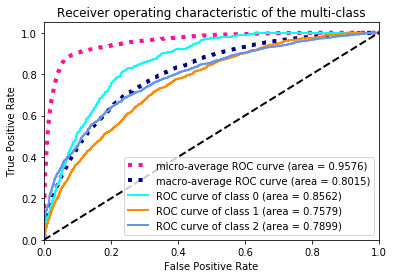

In [187]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of the multi-class')
plt.legend(loc="lower right")
plt.show()

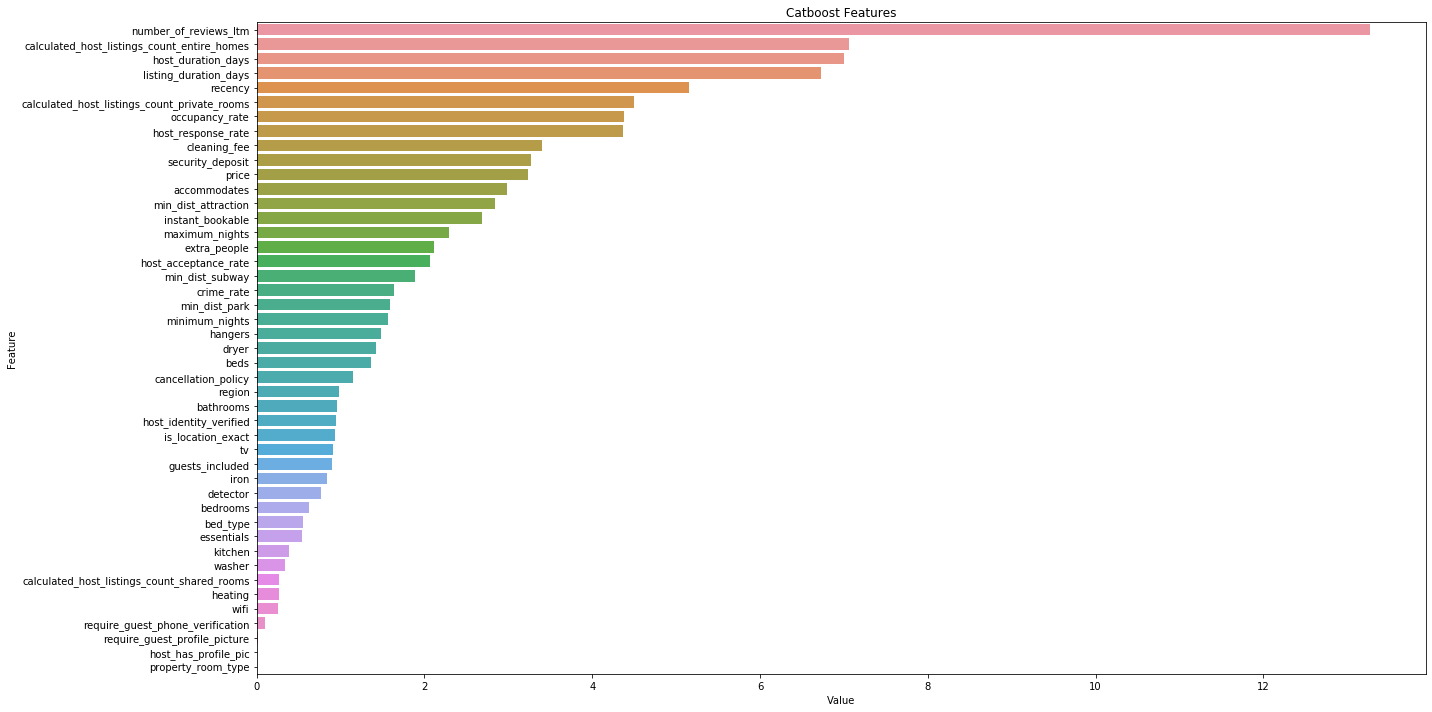

In [188]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(catbt.feature_importances_,x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()